<a href="https://colab.research.google.com/github/archisman-heartless/Titanic_prediction/blob/main/titanic1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/titanic.csv")
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
data=data.drop(["PassengerId","Name","Ticket","Cabin","Fare"],axis=1)
print(data)

     Survived  Pclass     Sex   Age  SibSp  Parch Embarked
0           0       3    male  22.0      1      0        S
1           1       1  female  38.0      1      0        C
2           1       3  female  26.0      0      0        S
3           1       1  female  35.0      1      0        S
4           0       3    male  35.0      0      0        S
..        ...     ...     ...   ...    ...    ...      ...
886         0       2    male  27.0      0      0        S
887         1       1  female  19.0      0      0        S
888         0       3  female   NaN      1      2        S
889         1       1    male  26.0      0      0        C
890         0       3    male  32.0      0      0        Q

[891 rows x 7 columns]


<Axes: >

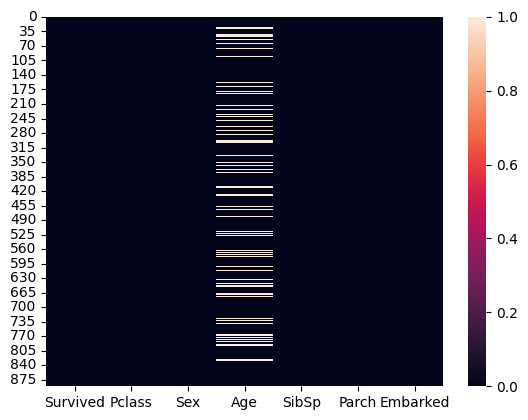

In [4]:
sns.heatmap(data.isnull())

In [5]:
avgage=data["Age"].mean()
data.fillna({'Age':avgage},inplace=True)

<Axes: >

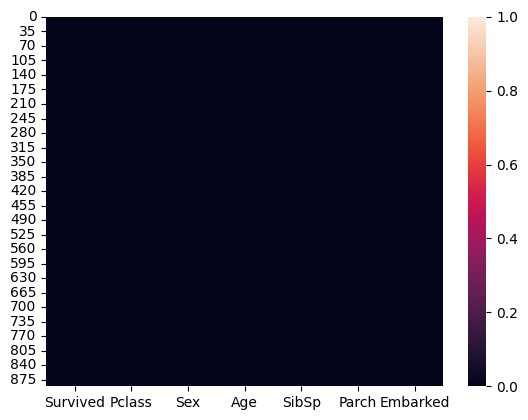

In [6]:
sns.heatmap(data.isnull())

<Axes: xlabel='Pclass', ylabel='count'>

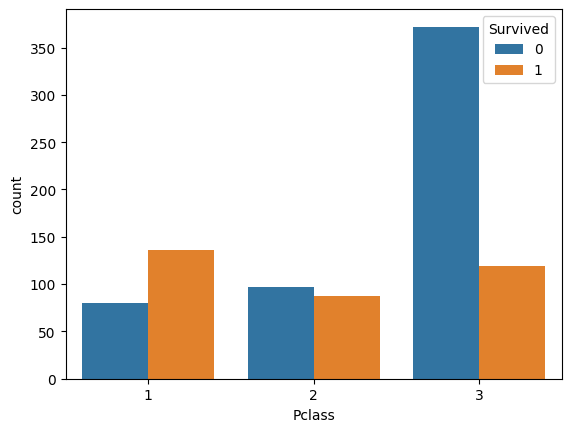

In [7]:
sns.countplot(x='Pclass',data=data,hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

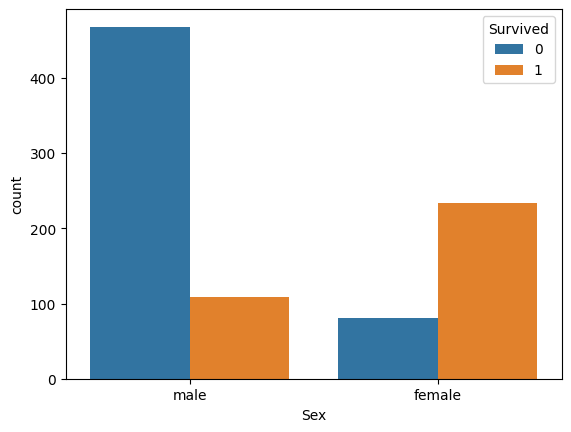

In [8]:
sns.countplot(x='Sex',data=data,hue='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

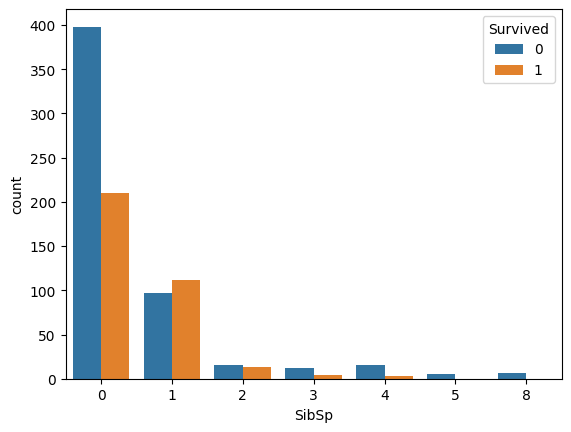

In [9]:
sns.countplot(x='SibSp',data=data,hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

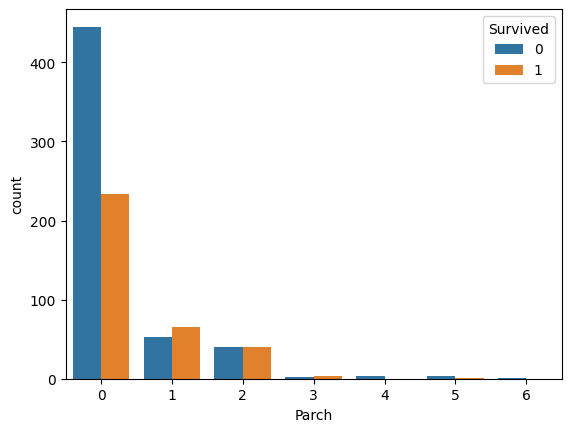

In [10]:
sns.countplot(x='Parch',data=data,hue='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

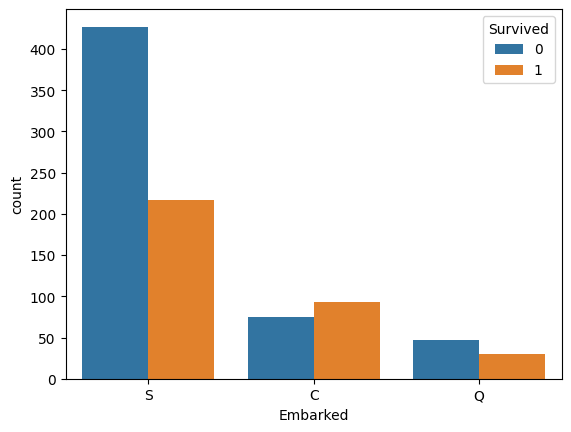

In [11]:
sns.countplot(x='Embarked',data=data,hue='Survived')

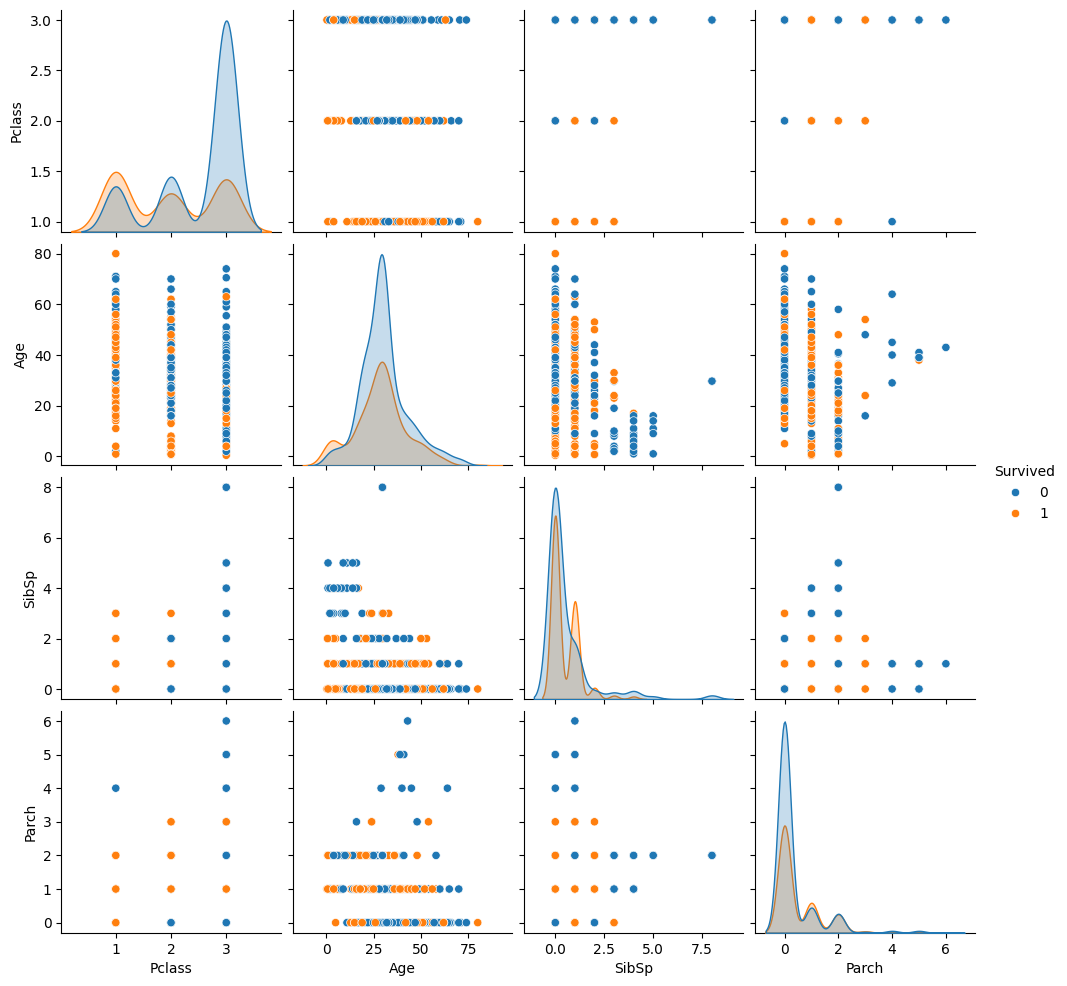

In [12]:
sns.pairplot(data,hue='Survived')

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])
print(data)

     Survived  Pclass  Sex        Age  SibSp  Parch  Embarked
0           0       3    1  22.000000      1      0         2
1           1       1    0  38.000000      1      0         0
2           1       3    0  26.000000      0      0         2
3           1       1    0  35.000000      1      0         2
4           0       3    1  35.000000      0      0         2
..        ...     ...  ...        ...    ...    ...       ...
886         0       2    1  27.000000      0      0         2
887         1       1    0  19.000000      0      0         2
888         0       3    0  29.699118      1      2         2
889         1       1    1  26.000000      0      0         0
890         0       3    1  32.000000      0      0         1

[891 rows x 7 columns]


In [14]:
y=data.iloc[:,0].values
x=data.iloc[:,1:].values
print(x)

[[ 3.          1.         22.          1.          0.          2.        ]
 [ 1.          0.         38.          1.          0.          0.        ]
 [ 3.          0.         26.          0.          0.          2.        ]
 ...
 [ 3.          0.         29.69911765  1.          2.          2.        ]
 [ 1.          1.         26.          0.          0.          0.        ]
 [ 3.          1.         32.          0.          0.          1.        ]]


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train)

[[ 3.          0.         29.69911765  0.          2.          0.        ]
 [ 2.          1.         31.          0.          0.          2.        ]
 [ 2.          1.         31.          1.          1.          0.        ]
 ...
 [ 3.          1.         29.69911765  0.          0.          1.        ]
 [ 3.          0.         36.          1.          0.          2.        ]
 [ 2.          1.         60.          1.          1.          2.        ]]


In [16]:
from sklearn.linear_model import LogisticRegression
logm=LogisticRegression()
logm.fit(x_train,y_train)

LogisticRegression()

In [17]:
inp=[[3,1,22.000000,1,0,2]]
yp=logm.predict(inp)
print(yp)

[0]


<Axes: >

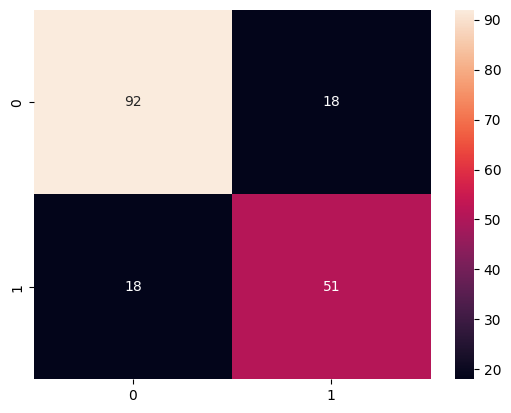

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
ypred=logm.predict(x_test)
cm=confusion_matrix(y_test,ypred)
sns.heatmap(cm,annot=True)

In [19]:
ac=accuracy_score(y_test,ypred)
print(ac)

0.7988826815642458
